In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user, password, host
import wrangle_zillow


import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')


### Wrangle FIPS data in order to identify county for each data point

In [2]:
county_df = wrangle_zillow.wrangle_county_fips()

In [3]:
county_df

,County
fips_number,
6037,Los Angeles County
6059,Orange County
6111,Ventura County


### Wrangle zillow data

In [119]:
zillow_df = wrangle_zillow.wrangle_zillow_data()

In [120]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County


In [121]:
zillow_df['property_tax_rate'] = (zillow_df.property_tax / zillow_df.house_value) * 100

In [122]:
la_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Los Angeles County']
orange_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Orange County']
ventura_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Ventura County']

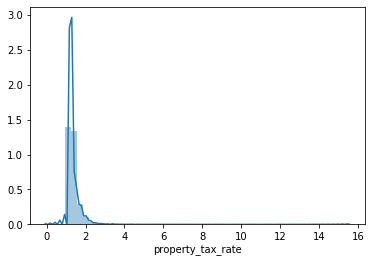

In [123]:
la_county_tax_rates_distplot = sns.distplot(la_county_tax_rates)

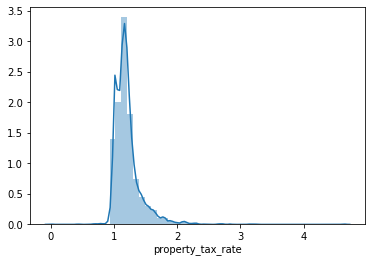

In [124]:
orange_county_tax_rates_displot = sns.distplot(orange_county_tax_rates)

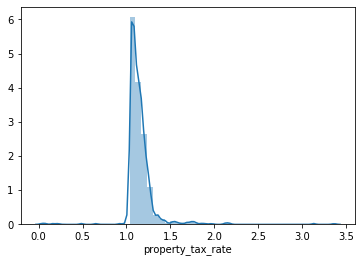

In [125]:
ventura_county_tax_rates_displot = sns.distplot(ventura_county_tax_rates)

### Split the data into train and test

In [126]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County,1.207256


In [127]:
df = zillow_df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']]
X = zillow_df[['bedrooms', 'bathrooms', 'square_feet']]
y = zillow_df[['house_value']]

In [128]:
df.head()

,bedrooms,bathrooms,square_feet,house_value
0,4.0,2.0,1604.0,498347.0
1,3.0,3.0,2384.0,549917.0
2,3.0,2.0,1574.0,235272.0
3,2.0,2.0,1619.0,340000.0
4,2.0,3.0,2408.0,2017254.0


In [129]:
import split_scale

In [130]:
train, test = split_scale.split_my_data(df)

### Scaling data:

In [131]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler(train, test)

In [132]:
train_scaled.head()

,bedrooms,bathrooms,square_feet,house_value
4042,-0.256929,-0.203570,-0.096489,-0.621618
4860,-0.256929,-0.203570,-0.521605,-0.056651
15948,0.784371,-0.203570,0.061620,-0.604959
9861,-0.256929,-0.203570,-0.458780,-0.272854
15734,0.784371,0.287445,0.585162,0.350450


In [133]:
X_train_scaled = train_scaled[['bedrooms', 'bathrooms', 'square_feet']]
y_train = train[['house_value']]

In [134]:
X_test = test.drop(columns='house_value')
y_test = test[['house_value']]

In [135]:
(X_train_scaled.isnull()).sum()

bedrooms       0
bathrooms      0
square_feet    0
dtype: int64

### Exploration

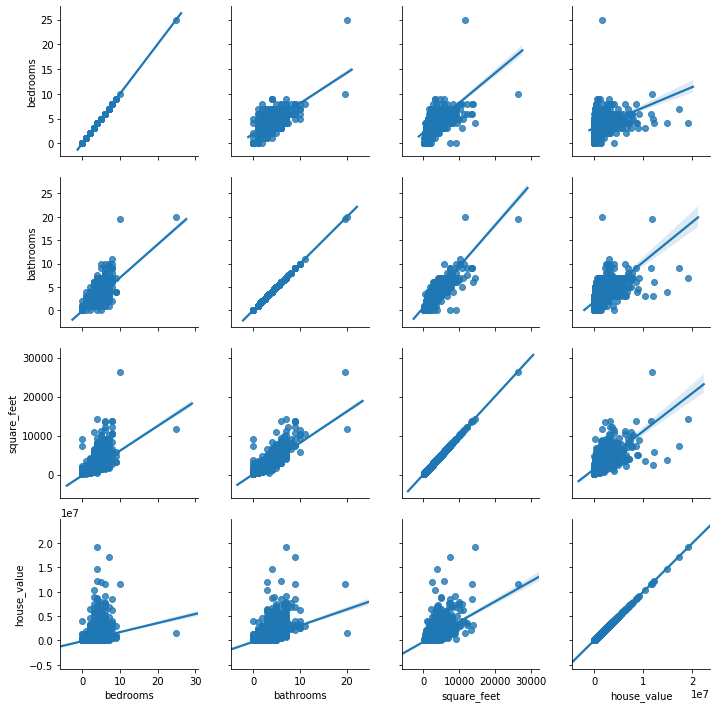

In [55]:
plot_variable_pairs(df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']])

(0, 4)

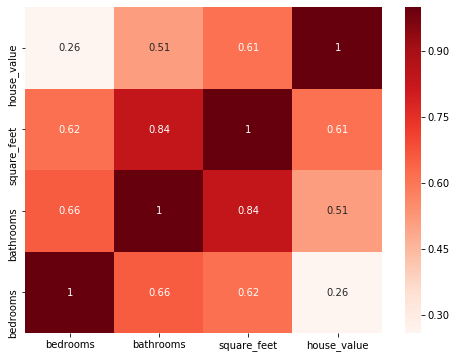

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Reds', annot=True)
plt.ylim(0, 4)

In [59]:
import statsmodels.api as sm

In [65]:
ols_model = sm.OLS(y_train, X_train_scaled)

In [152]:
res = sm.OLS(y, X).fit()

In [153]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            house_value   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.622
Method:                 Least Squares   F-statistic:                              8791.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                        0.00
Time:                        11:40:58   Log-Likelihood:                     -2.3230e+05
No. Observations:               16004   AIC:                                  4.646e+05
Df Residuals:                   16001   BIC:                                  4.646e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -1.486e+05   3615.496    -41.110      0.000   -1.56e+05   -1.42e+05
bathrooms     5.95e+04   7325.469      8.122      0.000    4.51e+04    7.39e+04
square_feet   445.0254      7.259     61.306      0.000     430.797     459.254
==============================================================================
Omnibus:                    23390.755   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20524310.210
Skew:                           8.517   Prob(JB):                         0.00
Kurtosis:                     177.610   Cond. No.                     4.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression - Fitting linear model to the Zillow data

In [136]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()

In [137]:
predictions=pd.DataFrame({'actual':y_train.house_value}).reset_index(drop=True)

lm1=LinearRegression()
lm1.fit(X_train_scaled[['bedrooms', 'bathrooms', 'square_feet']],y_train)
lm1_predictions=lm1.predict(X_train_scaled[['bedrooms', 'bathrooms', 'square_feet']])
predictions['lm1']=lm1_predictions

In [162]:
#baseline model
predictions['baseline'] = y_train.mean()[0]
predictions.head()

,actual,lm1,baseline
0,75333.0,441113.943182,458452.262282
1,423537.0,265832.601336,458452.262282
2,85600.0,367315.618559,458452.262282
3,290285.0,291736.247914,458452.262282
4,674444.0,611757.998417,458452.262282


In [163]:
lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

intercept:  [458452.26228228]
coefficients:  [[-133476.56008793   58203.21066567  412314.58419901]]


In [169]:
print('{} = b + m1 * {} + m2 * {} + m3 * {}'.format(y_train.columns[0], X_train_scaled.columns[0],X_train_scaled.columns[1],X_train_scaled.columns[2]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])
print('    coefficient (m3): %.2f' % lm1_coefficients[0][2])

house_value = b + m1 * bedrooms + m2 * bathrooms + m3 * square_feet
    y-intercept  (b): 458452.26
    coefficient (m1): -133476.56
    coefficient (m2): 58203.21
    coefficient (m3): 412314.58


In [175]:
y_pred_lm1 = lm1.predict(X_train_scaled)
y_pred_lm1

array([[441113.94318201],
       [265832.60133555],
       [367315.61855906],
       ...,
       [359517.45646038],
       [354128.43022498],
       [321066.64591072]])

In [174]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1))

linear model
  mean squared error: 2.27e+11


In [195]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
r2
# print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm1))

0.40325112583494893

In [201]:
y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)
# print('sum of squared errors\n model: {:.5}'.format(SSE))
# print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(evs))

In [202]:
pd.DataFrame({'actual': y_train,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_pred_baseline()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

min, max = 60, 100
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')

TypeError: 'numpy.ndarray' object is not callable

### Select Features using features script

### Evaluate Model vs Baseline

In [139]:
MSE_baseline = mean_squared_error(predictions.actual, predictions.baseline)
SSE_baseline = MSE_baseline*len(predictions.actual)
RMSE_baseline = sqrt(MSE_baseline)
r2_baseline = r2_score(predictions.actual, predictions.baseline)
print(MSE_baseline,SSE_baseline,RMSE_baseline,r2_baseline)

379857983661.29663 4863321764815581.0 616326.1990709924 0.0


In [143]:
MSE = mean_squared_error(predictions.actual, predictions.lm1)
SSE = MSE*len(predictions.actual)
RMSE = sqrt(MSE)
r2 = r2_score(predictions.actual, predictions.lm1)
print(MSE,SSE,RMSE,r2)

226679824092.4851 2902181787856087.0 476109.04643000127 0.40325112583494893


### Apply test data

In [146]:
model=lm1.predict(X_test[['bedrooms', 'bathrooms', 'square_feet']])
model=model.ravel().reshape(3201)
y_test1=np.array(y_test).ravel().reshape(3201)
best_model=pd.DataFrame({'predictions':model,'house_value':y_test1})

best_model.head()

,predictions,house_value
0,7.097678e+08,105370.0
1,7.226831e+08,233717.0
2,3.350491e+08,206900.0
3,5.163923e+08,162409.0
4,5.806381e+08,145150.0


In [ ]:
pd.DataFrame({'actual': y,
              'lm1': y_lm1_unscaled.ravel(),
              'lm_baseline': y_baseline_unscaled.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

min, max = 60, 100
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')

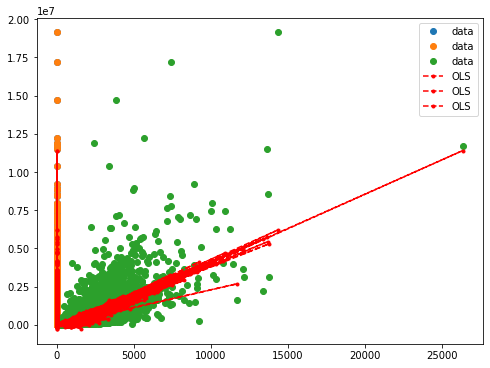

In [160]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, aX = plt.subplots(figsize=(8,6))

aX.plot(X, y, 'o', label="data")
#ax.plot(x, y, 'b-', label="True")
aX.plot(X, res.fittedvalues, 'r--.', label="OLS")
# aX.plot(X, iv_u, 'g--',label='97.5')
# aX.plot(X, iv_l, 'b--',label='2.5')
aX.legend(loc='best');